# Análise exploratória de casos de Dengue notificado pelo SUS

Neste tutorial vamos explorar como começar a entender a descrição de casos do sis tema de notificação de agravos do SUS, o SINAN. Estes dados são bastante ricos e a [documentação](www.sgc.goias.gov.br/upload/arquivos/2013-08/dengue2.pdf) sobre o significado de cada uma das variáveis pode ser encontrada [aqui](www.sgc.goias.gov.br/upload/arquivos/2013-08/dengue2.pdf).

In [1]:
import pandas as pd
import geopandas as gpd
import keplergl
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Primeiro vamos começar pelo carregamento dos dados a partir do site do InfoDengue. Como o dado está no formato CSV, nós vamos utilizar a biblioteca pandas para carregar os dados diretamente da web, em um Dataframe.

In [2]:
cols = [
    'ID_AGRAVO', 'DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'ID_MUNICIP',
    'DT_SIN_PRI', 'SEM_PRI', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT',
    'latitude', 'longitude',
    'NM_DISEASE'
]
casos = pd.read_csv(
    'https://info.dengue.mat.br/dumps/Mosquito.Borne.Disease.tar.gz',
    compression='gzip',
    header=0,
    usecols=cols)

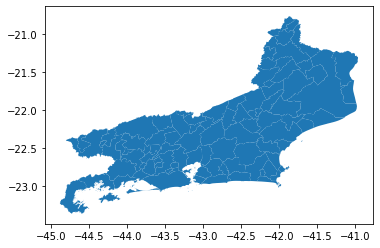

In [5]:
munrj = gpd.read_file('Dados/rj-municipalities.json')
munrj.plot();

In [7]:
munrj.head()

,id,name,geometry
0,ANGRA DOS REIS,ANGRA DOS REIS,"MULTIPOLYGON (((-44.35696 -23.21239, -44.35648..."
1,APERIBÉ,APERIBÉ,"POLYGON ((-42.11590 -21.60490, -42.11576 -21.6..."
2,ARARUAMA,ARARUAMA,"POLYGON ((-42.18249 -22.55270, -42.18221 -22.5..."
3,AREAL,AREAL,"POLYGON ((-43.04907 -22.20770, -43.04937 -22.2..."
4,ARMAÇÃO DOS BÚZIOS,ARMAÇÃO DOS BÚZIOS,"MULTIPOLYGON (((-41.94430 -22.73897, -41.94375..."


In [5]:
casos.head()

,ID_AGRAVO,DT_NOTIFIC,SEM_NOT,NU_ANO,ID_MUNICIP,DT_SIN_PRI,SEM_PRI,NU_IDADE_N,CS_SEXO,CS_GESTANT,latitude,longitude,NM_DISEASE
0,A90,2015-09-17,37.0,2015.0,330455.0,2015-08-26,34.0,4039.0,M,6.0,-22.925318,-43.388889,Dengue
1,A90,2015-05-15,19.0,2015.0,330455.0,2015-05-10,19.0,4044.0,F,5.0,-22.872878,-43.425393,Dengue
2,A90,2015-08-14,32.0,2015.0,330455.0,2015-08-08,31.0,4050.0,F,6.0,-22.826738,-43.329702,Dengue
3,A90,2015-08-18,33.0,2015.0,330455.0,2015-06-19,24.0,4056.0,F,9.0,-22.879648,-43.339151,Dengue
4,A90,2015-08-18,33.0,2015.0,330455.0,2015-06-18,24.0,4027.0,F,9.0,-22.814463,-43.380845,Dengue


Estes dados correspondem a todos os casos de dengue notificado ao SUS durante um período. Neste caso de 2015 a 2016. Para podermos tratar adequadamente estes dados para fins de visualização ou análise precisamos corrigir os tipos das colunas. Por exemplo vamos converter as datas.

In [27]:
casos.DT_NOTIFIC = pd.to_datetime(casos.DT_NOTIFIC)
casos.DT_SIN_PRI = pdd.to_datetime(casos.DT_SIN_PRI)

AttributeError: 'DataFrame' object has no attribute 'DT_NOTIFIC'

Para poder organizar os dados temporalmente, é útil indexar a tabela por alguma variável temporal

In [7]:
casos = casos.set_index('DT_NOTIFIC')

Agora podemos plotar o número de casos por semana de dengue na cidade do Rio de Janeiro.

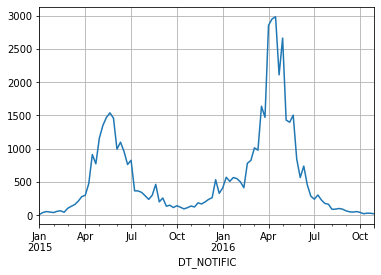

In [9]:
casos[casos.NM_DISEASE=='Dengue'].ID_AGRAVO.resample('1W').count().plot(grid=True);

## Visualizando os casos no Mapa

Suponhamos agora que desejamos visualizar em um mapa os casos que ocorreram, por exemplo entre janeiro e março de 2015

In [23]:
map1 = keplergl.KeplerGl(height=600,)
map1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(height=600)

In [ ]:
# Animando os casos
for ano in [2015., 2016.]:
    for i in range(1,53):
        map1.add_data(casos[(casos.NU_ANO==ano)&(casos.SEM_PRI<=float(i))])#,name=f'semana {i} de {int(ano)}')
#         time.sleep(1)

In [40]:
map1.add_data(munrj,name='Municipios')

## Lendo Shapefiles com o Geopandas

In [15]:
bairros = gpd.read_file('Dados/Bairros_rio_de_janeiro_csr84.shp', encoding='ascii')
bairros.head()

,N__REA,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,AREA,LEN,geometry
0,1.705684e+06,Paquetá,PAQUETA,1,13,21.0,13.0,Paquetá&area=13,1.705684e+06,24841.426123,"MULTIPOLYGON (((-43.10567 -22.74888, -43.10568..."
1,4.056403e+06,Freguesia,ILHA DO GOVERNADOR,3,98,20.0,98.0,Freguesia&area=98,4.056403e+06,18303.596291,"MULTIPOLYGON (((-43.17170 -22.77661, -43.17170..."
2,9.780466e+05,Bancários,ILHA DO GOVERNADOR,3,97,20.0,97.0,Bancários&area=97,9.780466e+05,7758.781330,"MULTIPOLYGON (((-43.18915 -22.78318, -43.18913..."
3,1.895742e+07,Galeão,ILHA DO GOVERNADOR,3,104,20.0,104.0,Galeão&area=104,1.895742e+07,21510.058418,"MULTIPOLYGON (((-43.22804 -22.78374, -43.22798..."
4,1.672546e+06,Tauá,ILHA DO GOVERNADOR,3,101,20.0,101.0,Tauá&area=101,1.672546e+06,8246.109606,"POLYGON ((-43.18039 -22.79940, -43.18055 -22.7..."


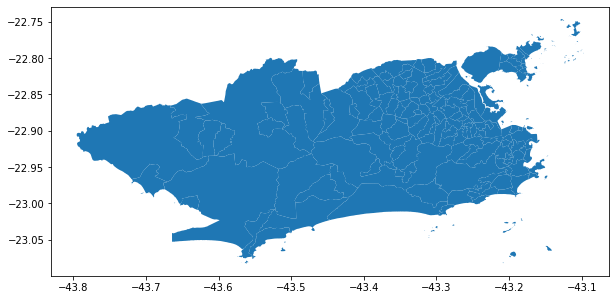

In [18]:
bairros.plot(figsize=(10,8));